In [1]:
import pandas as pd
# load the source data for each panel 
df = pd.read_excel('./figure_S3_sourcedata.xlsx',engine='openpyxl',sheet_name='Panel_a',index_col=0)

In [2]:
wins = ['0_25','0_3','0_35','0_4']
all_pairs = []
for i,w1 in enumerate(wins):
    for w2 in wins[i:]:
        if(w1 != w2):
            all_pairs.append((w1,w2))

p-value annotation legend:
ns: 1.00e-02 < p <= 1.00e+00
*: 1.00e-03 < p <= 1.00e-02
**: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0_25 v.s. 0_3: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.090e-03 U_stat=0.000e+00
0_3 v.s. 0_35: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.035e-01 U_stat=8.200e+01
0_35 v.s. 0_4: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.979e-03 U_stat=2.000e+00
0_25 v.s. 0_35: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.090e-03 U_stat=0.000e+00
0_3 v.s. 0_4: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.234e-01 U_stat=2.400e+01
0_25 v.s. 0_4: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.090e-03 U_stat=0.000e+00


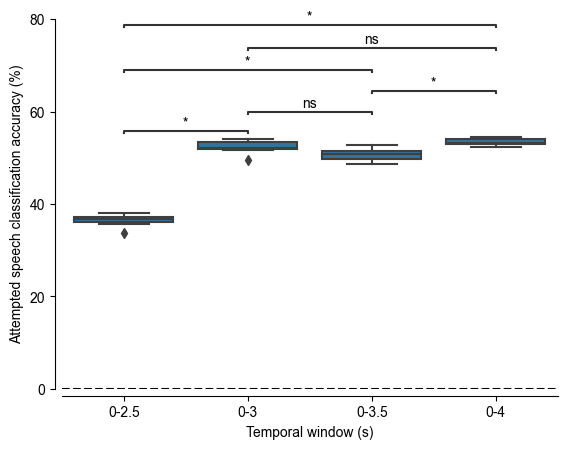

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from statannot import add_stat_annotation
import matplotlib as mpl
pvalue_thresholds = [[1e-4, "****"], [0.001, "**"], [0.01, "*"], [1, "ns"]]
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams.update({'font.size': 10})#, 'font.sans-serif': 'Arial'})
fig,ax = plt.subplots()
sns.boxplot(data=df,x='Window',y='Accuracy',color=sns.color_palette().as_hex()[0])
test_results = add_stat_annotation(ax, data=df,x='Window',y='Accuracy', 
                                   box_pairs = all_pairs,
                                   test='Mann-Whitney', text_format='star',
                                   loc='inside', verbose=2,line_offset=0.12,pvalue_thresholds=pvalue_thresholds)


ax.set_ylim([0,80])
ax.set_ylabel('Attempted speech classification accuracy (%)')
ax.set_xlabel('Temporal window (s)')
ax.set_xticklabels(['0-2.5','0-3','0-3.5','0-4'])
ax.axhline(1/104., linestyle = '--', color='k')
ax.set_yticks([0,20,40,60,80])
ax.set_ylim([0,80])
sns.despine(ax=ax, offset=dict(left=5, bottom=5))
plt.savefig('./figure_S3.jpg',dpi=300)